# Practice notebook for univariate analysis using NHANES data

This notebook will give you the opportunity to perform some univariate analyses on your own using the NHANES.  These analyses are similar to what was done in the week 2 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

da = pd.read_csv("nhanes_2015_2016.csv")
da.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

## Question 1

Relabel the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to have brief but informative character labels.  Then construct a frequency table of these values for all people, then for women only, and for men only.  Then construct these three frequency tables using only people whose age is between 30 and 40.

In [15]:
# insert your code here
da['DMDMARTL'] = da.DMDMARTL.replace({1:'Married',2:'Widowed',3:'Divorced',4:'Separated',5:'Never Married', 
                                      6:'Living with Partner',77:'Refused',99:"Don't Know"})
da['DMDMARTL'] = da.DMDMARTL.fillna('Missing')
all_pp = da['DMDMARTL'].value_counts()
women = da['DMDMARTL'][da.RIAGENDR==2].value_counts()
men = da['DMDMARTL'][da.RIAGENDR==1].value_counts()
print(women/women.sum())

print(men/men.sum())

Married                0.437836
Never Married          0.174731
Divorced               0.117608
Widowed                0.099462
Living with Partner    0.088038
Missing                0.042339
Separated              0.039651
Refused                0.000336
Name: DMDMARTL, dtype: float64
Married                0.535339
Never Married          0.175426
Living with Partner    0.096049
Divorced               0.083001
Missing                0.048931
Widowed                0.036245
Separated              0.024647
Refused                0.000362
Name: DMDMARTL, dtype: float64


__Q1a.__ Briefly comment on some of the differences that you observe between the distribution of marital status between women and men, for people of all ages.

__Q1b.__ Briefly comment on the differences that you observe between the distribution of marital status states for women between the overall population, and for women between the ages of 30 and 40.

__Q1c.__ Repeat part b for the men.

## Question 2

Restricting to the female population, stratify the subjects into age bands no wider than ten years, and construct the distribution of marital status within each age band.  Within each age band, present the distribution in terms of proportions that must sum to 1.

In [25]:
# insert your code here
women = da[da.RIAGENDR==2]
women['agegrp'] = pd.cut(women.RIDAGEYR,[18,25,35,45,55,65,75,85])
cnt = women.groupby('agegrp')['DMDMARTL'].value_counts().unstack()
cnt.apply(lambda x:x/x.sum(), axis=1)

DMDMARTL,Divorced,Living with Partner,Married,Missing,Never Married,Refused,Separated,Widowed
agegrp,,,,,,,,
"(18, 25]",0.009119,0.164134,0.133739,0.170213,0.498480,NaN,0.024316,NaN
"(25, 35]",0.044574,0.184109,0.467054,NaN,0.282946,NaN,0.021318,NaN
"(35, 45]",0.129225,0.091451,0.566600,NaN,0.149105,NaN,0.051690,0.011928
"(45, 55]",0.169043,0.069246,0.541752,NaN,0.109980,NaN,0.061100,0.048880
"(55, 65]",0.180000,0.046667,0.528889,NaN,0.106667,0.002222,0.048889,0.086667
"(65, 75]",0.196078,0.028011,0.428571,NaN,0.053221,NaN,0.050420,0.243697
"(75, 85]",0.096154,0.007692,0.292308,NaN,0.053846,NaN,0.011538,0.538462


__Q2a.__ Comment on the trends that you see in this series of marginal distributions.

__Q2b.__ Repeat the construction for males.

In [ ]:
# insert your code here

__Q2c.__ Comment on any notable differences that you see when comparing these results for females and for males.

## Question 3

Construct a histogram of the distribution of heights using the BMXHT variable in the NHANES sample.

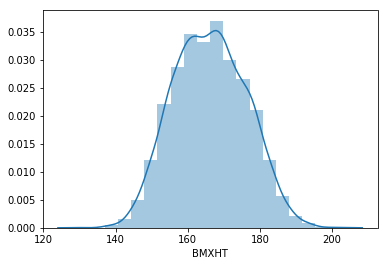

In [29]:
# insert your code here

#sns.distplot(da.BMXHT.dropna())
sns.distplot(da.BMXHT.dropna(),bins=20)

__Q3a.__ Use the `bins` argument to [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) to produce histograms with different numbers of bins.  Assess whether the default value for this argument gives a meaningful result, and comment on what happens as the number of bins grows excessively large or excessively small. 

__Q3b.__ Make separate histograms for the heights of women and men, then make a side-by-side boxplot showing the heights of women and men.

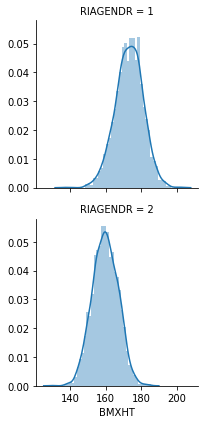

In [31]:
# insert your code here
g = sns.FacetGrid(da, row='RIAGENDR')
g = g.map(sns.distplot,'BMXHT')
plt.show()

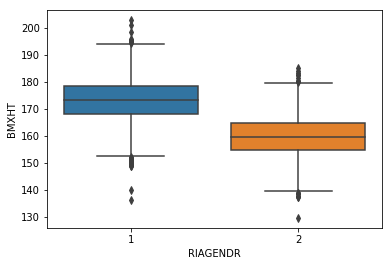

In [32]:
sns.boxplot(x='RIAGENDR',y='BMXHT',data=da)

__Q3c.__ Comment on what features, if any are not represented clearly in the boxplots, and what features, if any, are easier to see in the boxplots than in the histograms.

## Question 4

Make a boxplot showing the distribution of within-subject differences between the first and second systolic blood pressure measurents ([BPXSY1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY1) and [BPXSY2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY2)).

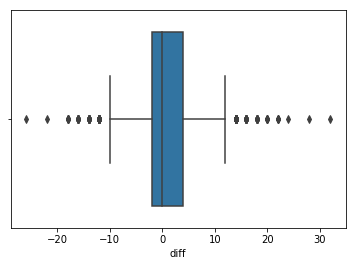

In [33]:
# insert your code here
da['diff'] = da['BPXSY1']-da['BPXSY2']
sns.boxplot(da['diff'])

__Q4a.__ What proportion of the subjects have a lower SBP on the second reading compared to the first?

In [43]:
# insert your code here
a = da['diff']>0
np.mean(a)

0.42946817785527464

__Q4b.__ Make side-by-side boxplots of the two systolic blood pressure variables.

Text(0,0.5,'Blood pressure in mm/Hg')

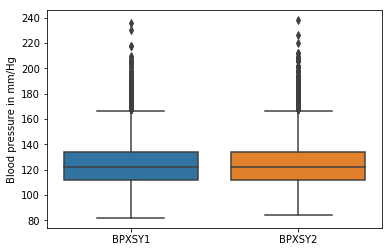

In [47]:
# insert your code here
sns.boxplot(data = da[['BPXSY1','BPXSY2']]).set_ylabel("Blood pressure in mm/Hg")

__Q4c.__ Comment on the variation within either the first or second systolic blood pressure measurements, and the variation in the within-subject differences between the first and second systolic blood pressure measurements.

## Question 5

Construct a frequency table of household sizes for people within each educational attainment category (the relevant variable is [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2)).  Convert the frequencies to proportions.

In [50]:
# insert your code here
cnt = da.groupby('DMDEDUC2')['DMDHHSIZ'].value_counts().unstack()
cnt

DMDHHSIZ,1,2,3,4,5,6,7
DMDEDUC2,,,,,,,
1.0,72.0,147.0,96.0,87.0,97.0,71.0,85.0
2.0,75.0,143.0,105.0,98.0,94.0,73.0,55.0
3.0,181.0,321.0,203.0,192.0,130.0,78.0,81.0
4.0,245.0,436.0,313.0,274.0,198.0,82.0,73.0
5.0,195.0,475.0,265.0,226.0,130.0,40.0,35.0
9.0,NaN,2.0,NaN,NaN,1.0,NaN,NaN


In [51]:
cnt.apply(lambda x:x/x.sum(), axis=1)

DMDHHSIZ,1,2,3,4,5,6,7
DMDEDUC2,,,,,,,
1.0,0.109924,0.224427,0.146565,0.132824,0.148092,0.108397,0.129771
2.0,0.116641,0.222395,0.163297,0.152411,0.146190,0.113530,0.085537
3.0,0.152614,0.270658,0.171164,0.161889,0.109612,0.065767,0.068297
4.0,0.151141,0.268970,0.193091,0.169031,0.122147,0.050586,0.045034
5.0,0.142753,0.347731,0.193997,0.165447,0.095168,0.029283,0.025622
9.0,NaN,0.666667,NaN,NaN,0.333333,NaN,NaN


__Q5a.__ Comment on any major differences among the distributions.

__Q5b.__ Restrict the sample to people between 30 and 40 years of age.  Then calculate the median household size for women and men within each level of educational attainment.

In [56]:
# insert your code here
midage = da[(da.RIDAGEYR>=30) & (da.RIDAGEYR<=40)]
midage.groupby(['RIAGENDR','DMDEDUC2'])['DMDHHSIZ'].median()

RIAGENDR  DMDEDUC2
1         1.0         5.0
          2.0         4.5
          3.0         4.0
          4.0         4.0
          5.0         3.0
2         1.0         5.0
          2.0         5.0
          3.0         5.0
          4.0         4.0
          5.0         3.0
Name: DMDHHSIZ, dtype: float64

## Question 6

The participants can be clustered into "maked variance units" (MVU) based on every combination of the variables [SDMVSTRA](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVSTRA) and [SDMVPSU](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVPSU).  Calculate the mean age ([RIDAGEYR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDAGEYR)), height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)), and BMI ([BMXBMI](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXBMI)) for each gender ([RIAGENDR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIAGENDR)), within each MVU, and report the ratio between the largest and smallest mean (e.g. for height) across the MVUs.

In [58]:
# insert your code here
da.groupby(['SDMVSTRA','SDMVPSU'])['RIAGENDR'].mean()


1.6535433070866141

__Q6a.__ Comment on the extent to which mean age, height, and BMI vary among the MVUs.

__Q6b.__ Calculate the inter-quartile range (IQR) for age, height, and BMI for each gender and each MVU.  Report the ratio between the largest and smalles IQR across the MVUs.

In [ ]:
# insert your code here

__Q6c.__ Comment on the extent to which the IQR for age, height, and BMI vary among the MVUs.